Coupled spring-mass system
======================================================================

This cookbook example shows how to solve a system of differential
equations. (Other examples include the
[Lotka-Volterra Tutorial](LotkaVolterraTutorial.html), the
[Zombie Apocalypse](Zombie_Apocalypse_ODEINT.html) and the
[KdV example](KdV.html).)

A Coupled Spring-Mass System
----------------------------

This figure shows the system to be modeled:

![](attachments/CoupledSpringMassSystem/two_springs_diagram.png)

Two objects with masses $m_1$ and $m_2$ are coupled through springs
with spring constants $k_1$ and $k_2$. The left end of the left spring
is fixed. We assume that the lengths of the springs, when subjected to
no external forces, are $L_1$ and $L_2$.

The masses are sliding on a surface that creates friction, so there are
two friction coefficients, $b_1$ and $b_2$.

The differential equations for this system are

$m_1 x_1'' + b_1 x_1' + k_1 (x_1 - L_1) - k_2 (x_2 - x_1 - L_2) = 0$

$m_2 x_2'' + b_2 x_2' + k_2 (x_2 - x_1 - L_2) = 0$

This is a pair of coupled second order equations. To solve this system
with one of the ODE solvers provided by SciPy, we must first convert
this to a system of first order differential equations. We introduce two
variables

$y_1 = x_1'$

 $y_2 = x_2'$

These are the velocities of the masses.

With a little algebra, we can rewrite the two second order equations as
the following system of four first order equations:

$x_1' = y_1$

$y_1' = (-b_1 y_1 - k_1 (x_1 - L_1) + k_2 (x_2 - x_1 - L_2))/m_1$

$x_2' = y_2$

$y_2' = (-b_2 y_2 - k_2 (x_2 - x_1 - L_2))/m_2$

These equations are now in a form that we can implement in Python.

The following code defines the "right hand side" of the system of
equations (also known as a vector field). I have chosen to put the
function that defines the vector field in its own module (i.e. in its
own file), but this is not necessary. Note that the arguments of the
function are configured to be used with the function odeint: the time t is the
second argument.

In [1]:
def vectorfield(t, w, p):
    """
    The differential equations for the coupled spring-mass system.

    Arguments:
        t :  time
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

Set the problem parameter values

In [2]:
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

Initial conditions
`x1` and `x2` are the initial displacements; `y1` and `y2` are the initial velocities

In [3]:
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

Set solver parameters; in this case just the time interval over which to integrate

In [4]:
interval = [0, 10.0]

Create the time samples for the final figure.
`solve_ivp` will evaluate our function at these timestamps, 
once it has solved the equation itself

In [5]:
import numpy as np

t = np.linspace(*interval, 150)

Pack up the parameters and initial conditions:

In [6]:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

Perform the actual integration

In [7]:
from scipy.integrate import solve_ivp

solution = solve_ivp(vectorfield, interval, w0, t_eval=t, args=(p,))
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.711e-02 ...  9.933e+00  1.000e+01]
        y: [[ 5.000e-01  5.645e-01 ...  4.992e-01  5.080e-01]
            [ 0.000e+00  1.852e+00 ...  1.694e-01  9.234e-02]
            [ 2.250e+00  2.206e+00 ...  1.478e+00  1.480e+00]
            [ 0.000e+00 -1.263e+00 ...  4.381e-03  4.901e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 704
     njev: 0
      nlu: 0

Plot the obtained solution.

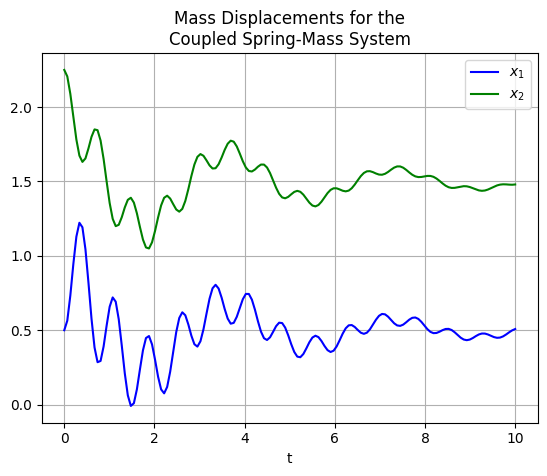

In [8]:
import matplotlib.pyplot as plt

# `solver.y` has shape 4, 150; unpack it into its four components
x1, xy, x2, y2 = solution.y

plt.figure()


plt.plot(solution.t, x1, 'b')
plt.plot(solution.t, x2, 'g')
plt.legend((r'$x_1$', r'$x_2$'))
plt.xlabel('t')
plt.title('Mass Displacements for the\nCoupled Spring-Mass System')
plt.grid(True);